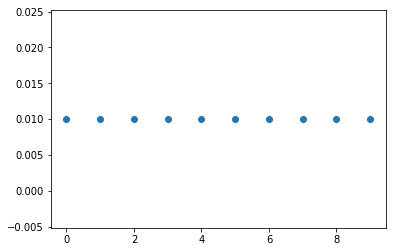

total iterations: 10| breed rate: 1| population size: 100


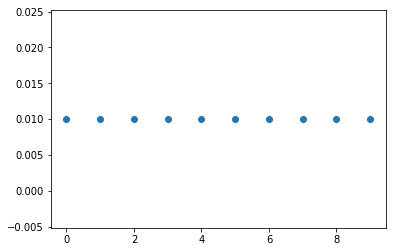

total iterations: 10| breed rate: 10| population size: 100


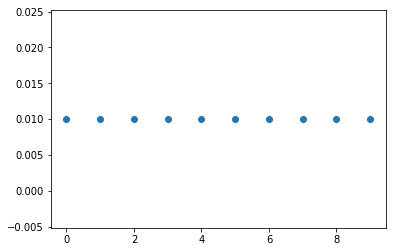

total iterations: 10| breed rate: 25| population size: 100


In [22]:

import random 
import math
import numpy as np
import matplotlib.pyplot as plt

test_boards = [[2,4,7,4,8,5,5,2],[3,2,7,5,2,4,1,1],[2,4,4,1,5,1,2,4],[3,2,5,4,3,2,1,3]]

#constants/twiddle factors
num_iterations = 10
mutation_thresh = .89
pop_size = 100

#breeding frequencies
pandas = math.ceil(.01 * pop_size)
humans = math.ceil(.1 * pop_size) 
rabbits = math.ceil(.25 * pop_size)

def test():
    fscores=[]
    for board in test_boards:
        fscore = fitness(board)
        print('fitness: ', fscore)
        fscores.append(fscore)
    fprobs = fitprobs(4, fscores)
    print(fprobs)

def goal_state(board):

    if fitness(board) == 28:
        return True
    return False

def randomize (board, n): 
    for i in range(n):  
        queens = random.randint(1,8)  
        board[i] = queens 
    return board 

population = []

def generate_population(population_size):

    population = []
    for _ in range(population_size):
        board = [0,0,0,0,0,0,0,0] 
        n = len(board) 
        randomize(board, n)
        population.append(board) 
    return population

def fitness(board):
    
    fitness = 28
    for i in range(len(board)-1):
        queen = i+1
        # print(f'\nThis queen: ({queen}, {board[i]})')
        # print('Other queens: ', end='')
        for j in range(i+1, len(board)):
            # is_attack = ''
            other_queen = j+1
            if(board[i] == board[j]):
                fitness -= 1
                # is_attack = '<-A!'
            elif abs((board[i] - board[j])/((queen)-(other_queen))) == 1:
                fitness -= 1
                # is_attack = '<-A!'
            # print(f'({other_queen}, {board[j]}){is_attack}, ', end='')
    
    return fitness

def get_probs(population):

    fscores = []
    for i in range(len(population)):
        fscore = fitness(population[i])
        fscores.append(fscore)
    fprobs = fitprobs(len(population), fscores)
    
    return fprobs

def fitprobs(pop_size, fs):

    denom = 0
    probs = []
    for i in range(pop_size):
        denom+=fs[i]
    if(denom > 0):
        for i in range(pop_size):
            s_i = fs[i]/denom 
            probs.append(s_i)
    else: 
        print("Error: Denom !>0 !")
        exit()
    return probs

def get_avg_fitness(d):

    avg = 0
    # max = 0 
    # min = 1
    for i in d:
        # if i[0] > max:
        #     max = i[0]
        # if i[0] < min:
        #     min = i[0]
        avg+=i[0]
    # print(f'average: {avg/len(d)}, max: {max}, min: {min}')
    avg = avg/len(d)
    return avg


def cull_population(d, original_popsize): #I do not support eugenics--this is a math problem not real life

    pop_size = len(d)
    cull_size = pop_size-original_popsize
    d = sorted(d, key=lambda x: x[0])
    del d[0:cull_size]
    # print("population size after culling: ", len(d))

def fitness_proportionate_selection(d):

    sum_of_fitness = 0.0
    bins = []
    for i in d:
        sum_of_fitness+=i[0]
    # print(sum_of_fitness)
    # print(d)
    prev_prob = 0.0
    d = sorted(d, key=lambda x: x[0])
    for i in range(len(d)): 
        # print(d[i][0])
        right_range =  prev_prob + d[i][0] 
        bins.append([prev_prob, right_range])
        prev_prob += d[i][0]
    # for bin in bins:
    #     print(bin)
    return bins

def select_from_population(bins, d):

    mom, dad = [],[]

    while(mom == dad):
        x = random.randint(0, 100)/100
        y = random.randint(0, 100)/100
        x = .9999999 if x == 1.0 else x 
        x = .0000001 if x == 0.0 else x
        y = .9999999 if y == 1.0 else y 
        y = .0000001 if y == 0.0 else y
        while(y == x):
            y = random.randint(0, 100)/100
        for i, bin in enumerate(bins):
            if x >= bin[0] and x <= bin[1]:
                mom = d[i]
            if y >= bin[0] and y <= bin[1]:
                dad = d[i]
    # print(x, y)
    if mom == [] or dad == []:
        print("Empty list after selection! Exiting.")
        exit()

    return mom, dad


def breed(d):
    
    bins = fitness_proportionate_selection(d)
    mom, dad = select_from_population(bins, d)
    # print(f'mom: {mom}, dad: {dad}')

    split = random.randint(1,7)
    # print(f'split = {split}')
    
    mom_genes_first = mom[1][0:split]
    dad_genes_first = dad[1][split:]
    dad_genes_secnd = dad[1][0:split]
    mom_genes_secnd = mom[1][split:]
    # print(f'{mom_genes_first} , {dad_genes_first}')
    # print(f'{dad_genes_secnd} , {mom_genes_secnd}')
    
    first_born = [0,0,0,0,0,0,0,0]
    secnd_born = [0,0,0,0,0,0,0,0]
    for i in range(8):
        if i < split:
            first_born[i] = mom_genes_first[i]
            secnd_born[i] = dad_genes_secnd[i]
        else: 
            first_born[i] = dad_genes_first[split-i]
            secnd_born[i] = mom_genes_secnd[split-i]
    # print(f'M: {mom}, D: {dad}, C1: {first_born}, C2: {secnd_born}') 
    
    return first_born, secnd_born

def mutate(c1, c2):

    m1 = random.randint(0, 100)/100
    m2 = random.randint(0, 100)/100
    if m1 >= mutation_thresh:
        queen_to_mutate = random.randint(0, 7)
        c1[queen_to_mutate] = random.randint(1, 8)  
    if m2 >= mutation_thresh:
        queen_to_mutate = random.randint(0, 7)
        c2[queen_to_mutate] = random.randint(1, 8)  

def get_fuckin(breed_freq):    
        
    population = generate_population(pop_size)
    probs = get_probs(population)
    d = list(zip(probs, population))
    avg_fitness_to_pop = []

    for i in range(num_iterations):
        avg_fitness_to_pop.append((i, get_avg_fitness(d)))
        for k in range(len(d)):
            if goal_state(d[k][1]):
                print(f'Goal State has been found! After: {i} iterations by breeding {breed_freq} parents at a time')
                return
        d = sorted(d, key=lambda x: x[0])
        for k in range(breed_freq):
            child1, child2 = breed(d)
            mutate(child1, child2)
        cull_population(d, pop_size)  
    # print(avg_fitness_to_pop, breed_freq)  
    return avg_fitness_to_pop


def main():

    # test()   

    avg1 = get_fuckin(pandas)
    avg2 = get_fuckin(humans)
    avg3 = get_fuckin(rabbits)

    x1 = [avg[0] for avg in avg1]
    y1 = [avg[1] for avg in avg1]

    plt.scatter(x1, y1)
    plt.show()
    print(f'total iterations: {num_iterations}| breed rate: {pandas}| population size: {pop_size}')

    x2 = [avg[0] for avg in avg2]
    y2 = [avg[1] for avg in avg2]

    plt.scatter(x2, y2)
    plt.show()
    print(f'total iterations: {num_iterations}| breed rate: {humans}| population size: {pop_size}')

    x3 = [avg[0] for avg in avg3]
    y3 = [avg[1] for avg in avg3]

    plt.scatter(x3, y3)
    plt.show()
    print(f'total iterations: {num_iterations}| breed rate: {rabbits}| population size: {pop_size}')

if __name__ == "__main__":
    main()

